#### Cleaning data for 210

In [46]:
#import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import clean_columns, univariate, winz_outliers


%matplotlib inline

In [47]:
#Import data
dm_df = pd.read_csv('diabetic_data.csv')
dm_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [48]:
# https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Citation 
# Clore,John, Cios,Krzysztof, DeShazo,Jon, and Strack,Beata. (2014). Diabetes 130-US Hospitals for Years 1999-2008. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J.

## Data Dictionary

[link] https://www.hindawi.com/journals/bmri/2014/781670/tab1/

Feature name	Type	Description and values	% missing

Encounter ID	Numeric	Unique identifier of an encounter	0%

Patient number	Numeric	Unique identifier of a patient	0%

Race	Nominal	Values: Caucasian, Asian, African American, Hispanic, and other	2%

Gender	Nominal	Values: male, female, and unknown/invalid	0%

Age	Nominal	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	0%

Weight	Numeric	Weight in pounds.	97%

Admission type	Nominal	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	0%

Discharge disposition	Nominal	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	0%

Admission source	Nominal	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	0%

Time in hospital	Numeric	Integer number of days between admission and discharge	0%

Payer code	Nominal	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	52%

Medical specialty	Nominal	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	53%

Number of lab procedures	Numeric	Number of lab tests performed during the encounter	0%

Number of procedures	Numeric	Number of procedures (other than lab tests) performed during the encounter	0%

Number of medications	Numeric	Number of distinct generic names administered during the encounter	0%

Number of outpatient visits	Numeric	Number of outpatient visits of the patient in the year preceding the encounter	0%

Number of emergency visits	Numeric	Number of emergency visits of the patient in the year preceding the encounter	0%

Number of inpatient visits	Numeric	Number of inpatient visits of the patient in the year preceding the encounter	0%


Diagnosis 1	Nominal	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	0%

Diagnosis 2	Nominal	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	0%

Diagnosis 3	Nominal	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	1%

Number of diagnoses	Numeric	Number of diagnoses entered to the system	0%

Glucose serum test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	0%

A1c test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	0%

Change of medications	Nominal	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	0%

Diabetes medications	Nominal	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%

24 features for medications	Nominal	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	0%

Readmitted	Nominal	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no
disch


In [49]:
dm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [50]:
## Choose variables to narrow down
# patient_nbr

diabetes_df = dm_df[[
    "patient_nbr", "gender", "age", "weight", "admission_type_id",
    "time_in_hospital", "num_lab_procedures", "num_procedures",
    "max_glu_serum", "A1Cresult", "diabetesMed", "readmitted"
]].copy()
#Verify new data set
diabetes_df.head()

,patient_nbr,gender,age,weight,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,max_glu_serum,A1Cresult,diabetesMed,readmitted
0,8222157,Female,[0-10),?,6,1,41,0,NaN,NaN,No,NO
1,55629189,Female,[10-20),?,1,3,59,0,NaN,NaN,Yes,>30
2,86047875,Female,[20-30),?,1,2,11,5,NaN,NaN,Yes,NO
3,82442376,Male,[30-40),?,1,2,44,1,NaN,NaN,Yes,NO
4,42519267,Male,[40-50),?,1,1,51,0,NaN,NaN,Yes,NO


In [51]:
## Find duplicates
print(diabetes_df.duplicated().value_counts()) # this gives a count of unique values (this case is true/false)
print(diabetes_df.duplicated().sum()) # This gives a count of the nymber of duplicates(counting the true)

False    101726
True         40
Name: count, dtype: int64


40


In [52]:
# Remove duplicates
diabetes_df.drop_duplicates()
print(diabetes_df.duplicated().value_counts()) #Verify there are no duplicates

False    101726
True         40
Name: count, dtype: int64


In [53]:
#Count number of missing values by columns
diabetes_df.isnull().sum() 

patient_nbr               0
gender                    0
age                       0
weight                    0
admission_type_id         0
time_in_hospital          0
num_lab_procedures        0
num_procedures            0
max_glu_serum         96420
A1Cresult             84748
diabetesMed               0
readmitted                0
dtype: int64

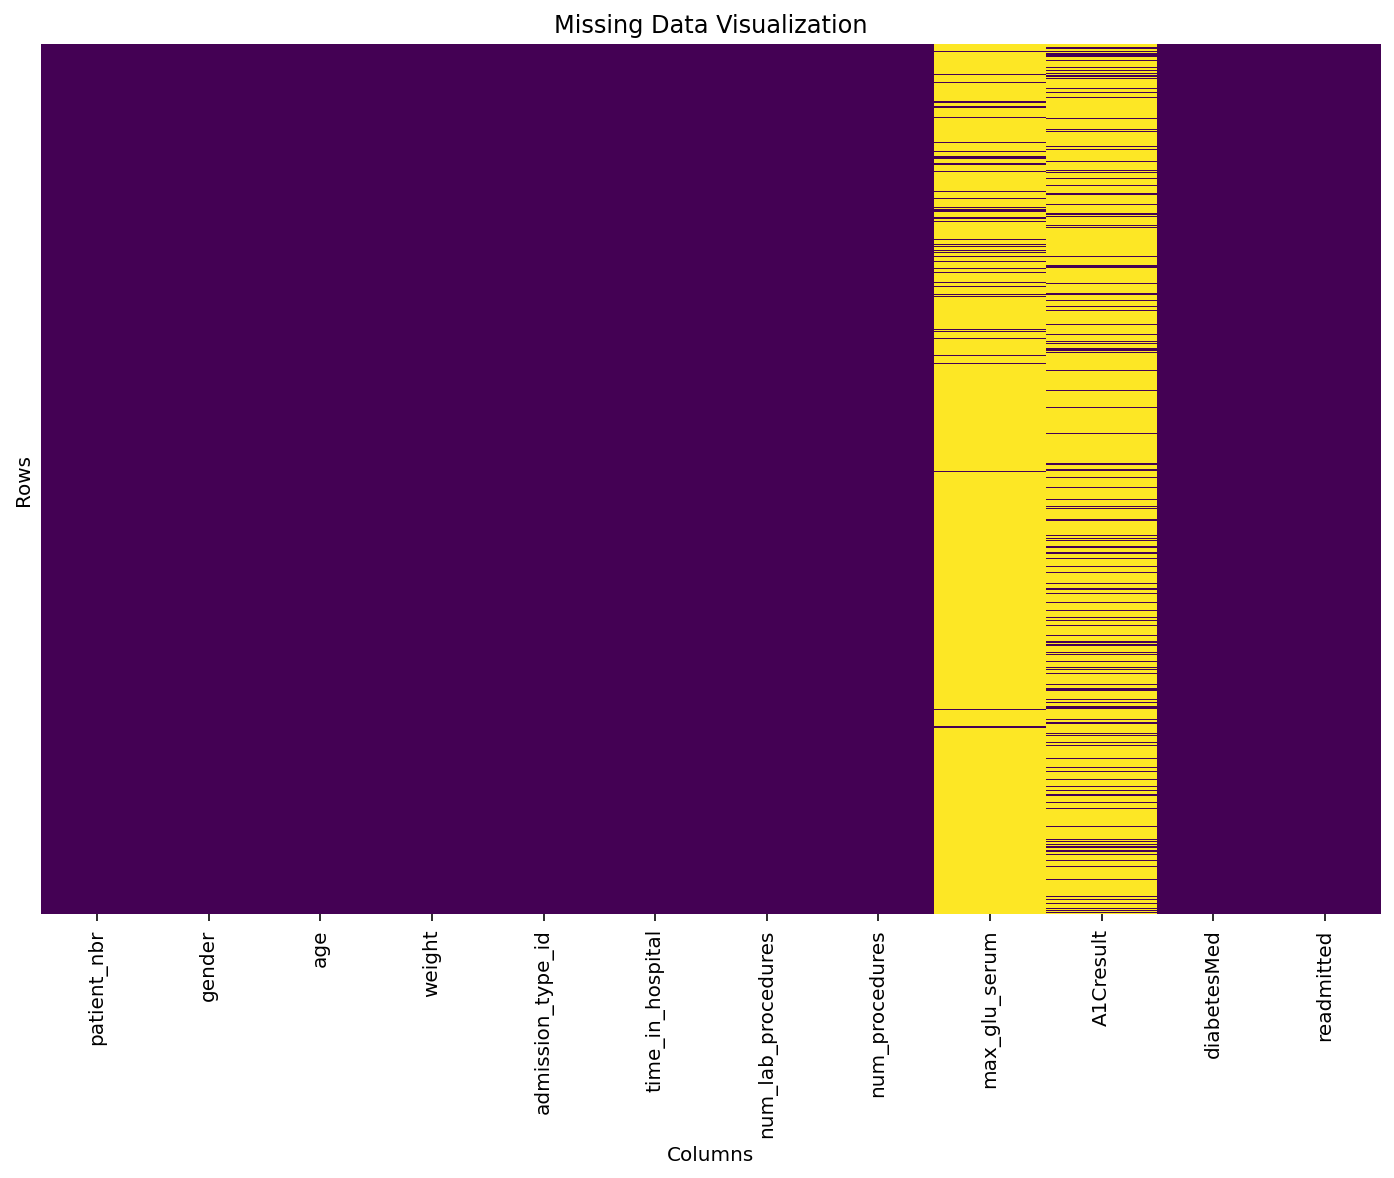

In [54]:
## Create Visualizations of the missing value

plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary

# Create a heatmap to visualize missing data (null values)
# Set cbar=False to hide the color bar and add column names (xticklabels) for clarity
sns.heatmap(diabetes_df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=diabetes_df.columns)
plt.xticks(rotation=90)  # Rotate column names for better readability

plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [55]:
# drop missing value columns - not enough to use (ie > 60%missing)
diabetes_df = dm_df[[
    "patient_nbr", "gender", "age", "weight", "admission_type_id",
    "time_in_hospital", "num_lab_procedures", "num_procedures",
    "diabetesMed", "readmitted"
]].copy()
#Verify new data set
diabetes_df.head()

,patient_nbr,gender,age,weight,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,diabetesMed,readmitted
0,8222157,Female,[0-10),?,6,1,41,0,No,NO
1,55629189,Female,[10-20),?,1,3,59,0,Yes,>30
2,86047875,Female,[20-30),?,1,2,11,5,Yes,NO
3,82442376,Male,[30-40),?,1,2,44,1,Yes,NO
4,42519267,Male,[40-50),?,1,1,51,0,Yes,NO


In [56]:
#unique values
diabetes_df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

<Axes: >

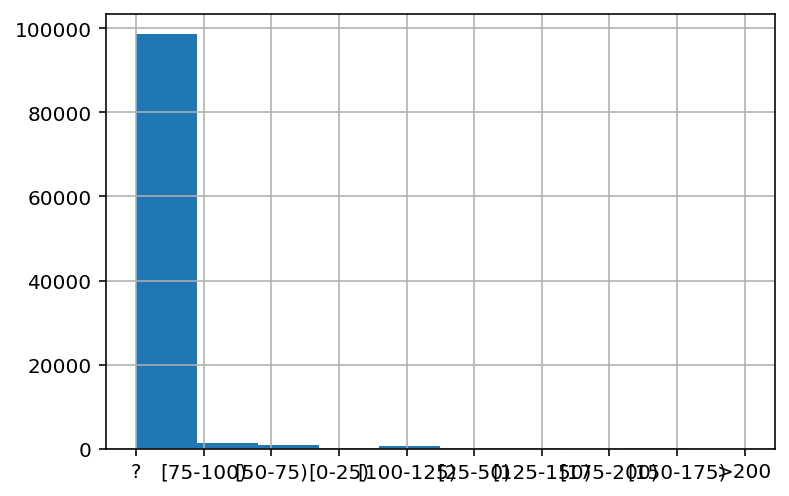

In [57]:
#View weight. Keep/ drop based on output
diabetes_df.weight.hist()

In [58]:
# Drop weight due to too many unknown values
# drop missing value columns - not enough to use (ie > 60%missing)
diabetes_df = dm_df[[
    "patient_nbr", "gender", "age","admission_type_id",
    "time_in_hospital", "num_lab_procedures", "num_procedures",
    "diabetesMed", "readmitted"
]].copy()
#Verify new data set
diabetes_df.head()

,patient_nbr,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,diabetesMed,readmitted
0,8222157,Female,[0-10),6,1,41,0,No,NO
1,55629189,Female,[10-20),1,3,59,0,Yes,>30
2,86047875,Female,[20-30),1,2,11,5,Yes,NO
3,82442376,Male,[30-40),1,2,44,1,Yes,NO
4,42519267,Male,[40-50),1,1,51,0,Yes,NO


In [59]:
# #admission_type_id	description
# 1	Emergency
# 2	Urgent
# 3	Elective
# 4	Newborn
# 5	Not Available
# 6	NULL
# 7	Trauma Center
# 8	Not Mapped


In [60]:
# Remove rows that have irrelevant or unknown admission types
diabetes_df = diabetes_df.drop(diabetes_df[diabetes_df.admission_type_id >= 4].index)
diabetes_df.admission_type_id.unique()

array([1, 2, 3])

In [61]:
admis_map = {1: "Emergency", 2:"Urgent", 3:"Elective"}
diabetes_df["admission_type"] = diabetes_df["admission_type_id"].replace(admis_map)
diabetes_df.drop("admission_type_id", axis = 1, inplace = True)
print(diabetes_df)

        patient_nbr  gender      age  time_in_hospital  num_lab_procedures  \
1          55629189  Female  [10-20)                 3                  59   
2          86047875  Female  [20-30)                 2                  11   
3          82442376    Male  [30-40)                 2                  44   
4          42519267    Male  [40-50)                 1                  51   
5          82637451    Male  [50-60)                 3                  31   
...             ...     ...      ...               ...                 ...   
101761    100162476    Male  [70-80)                 3                  51   
101762     74694222  Female  [80-90)                 5                  33   
101763     41088789    Male  [70-80)                 1                  53   
101764     31693671  Female  [80-90)                10                  45   
101765    175429310    Male  [70-80)                 6                  13   

        num_procedures diabetesMed readmitted admission_type  


In [62]:
age_bin_map = {"[0-10)": "0-10","[10-20)": "10-20", "[20-30)": "20-30", "[30-40)": "30-40", "[40-50)": "40-50", "[50-60)": "50-60", "[60-70)":"60-70", "[70-80)": "70-80", "[80-90)": "80-90", "[90-100)": "90-100"}
diabetes_df["age_bins"] = diabetes_df["age"].replace(age_bin_map)
diabetes_df.drop("age", axis = 1, inplace = True)
#Verify

print(diabetes_df)

        patient_nbr  gender  time_in_hospital  num_lab_procedures  \
1          55629189  Female                 3                  59   
2          86047875  Female                 2                  11   
3          82442376    Male                 2                  44   
4          42519267    Male                 1                  51   
5          82637451    Male                 3                  31   
...             ...     ...               ...                 ...   
101761    100162476    Male                 3                  51   
101762     74694222  Female                 5                  33   
101763     41088789    Male                 1                  53   
101764     31693671  Female                10                  45   
101765    175429310    Male                 6                  13   

        num_procedures diabetesMed readmitted admission_type age_bins  
1                    0         Yes        >30      Emergency    10-20  
2                    5     

In [63]:
diabetes_df.age_bins.unique()

array(['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80',
       '80-90', '90-100', '0-10'], dtype=object)

In [67]:
#Drop pediatric ages 0-10
diabetes_df = diabetes_df.drop(diabetes_df[diabetes_df.age_bins == "0-10"].index)
#Verify
diabetes_df.age_bins.unique()

array(['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80',
       '80-90', '90-100'], dtype=object)

In [34]:
# Rename Readmission to yes / No
# > 30 = No, NO = No, <30 = Yes

In [68]:
readmis_map = { ">30" : "No", "NO":"No", "<30": "Yes"}
diabetes_df["readmitted"] = diabetes_df["readmitted"].replace(readmis_map)
print(diabetes_df)

        patient_nbr  gender  time_in_hospital  num_lab_procedures  \
1          55629189  Female                 3                  59   
2          86047875  Female                 2                  11   
3          82442376    Male                 2                  44   
4          42519267    Male                 1                  51   
5          82637451    Male                 3                  31   
...             ...     ...               ...                 ...   
101761    100162476    Male                 3                  51   
101762     74694222  Female                 5                  33   
101763     41088789    Male                 1                  53   
101764     31693671  Female                10                  45   
101765    175429310    Male                 6                  13   

        num_procedures diabetesMed readmitted admission_type age_bins  
1                    0         Yes         No      Emergency    10-20  
2                    5     

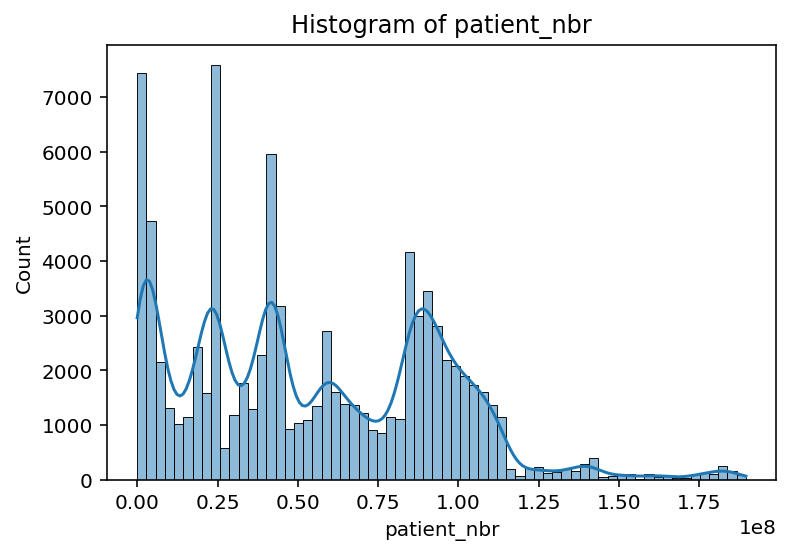

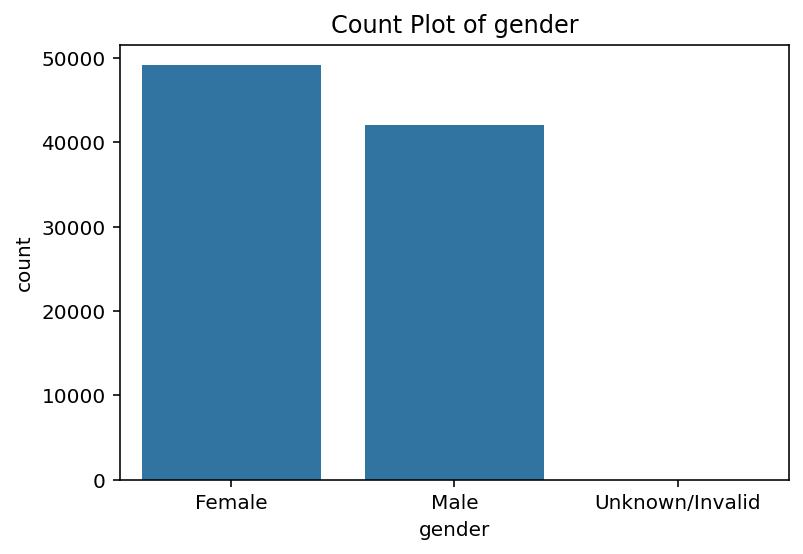

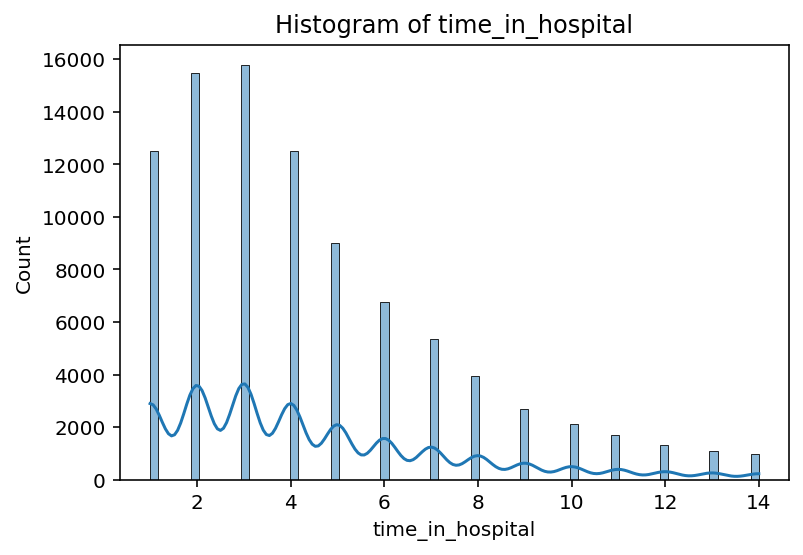

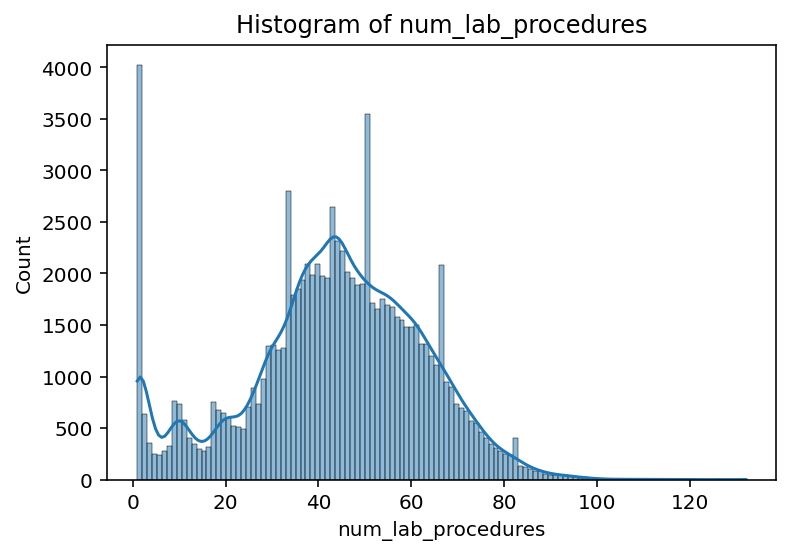

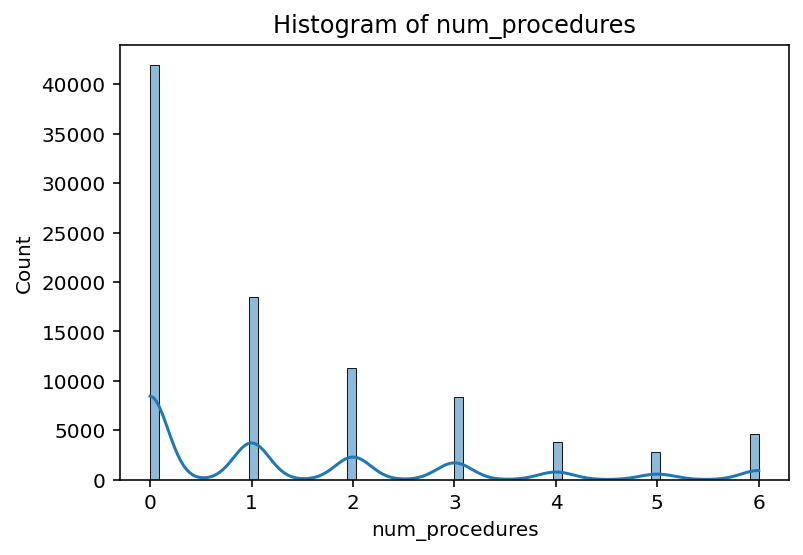

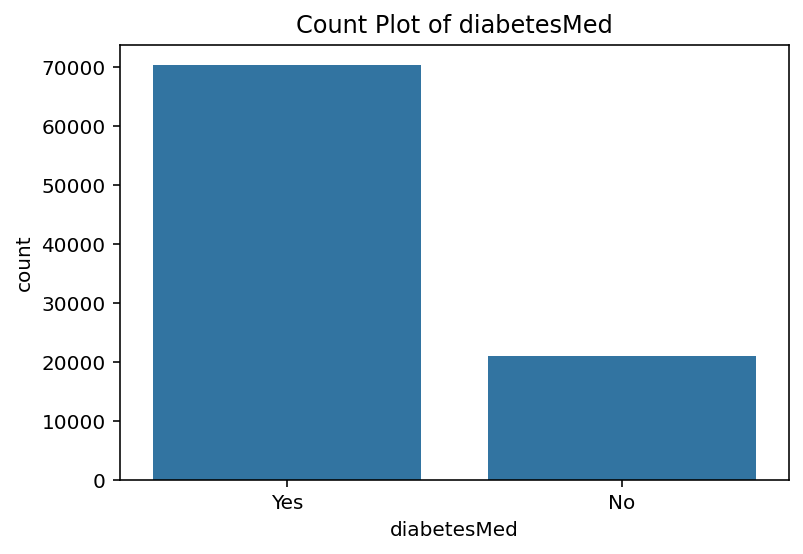

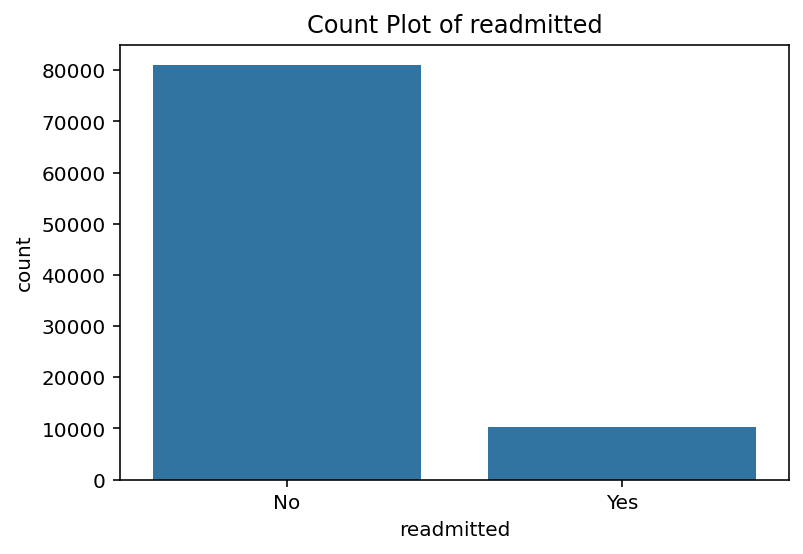

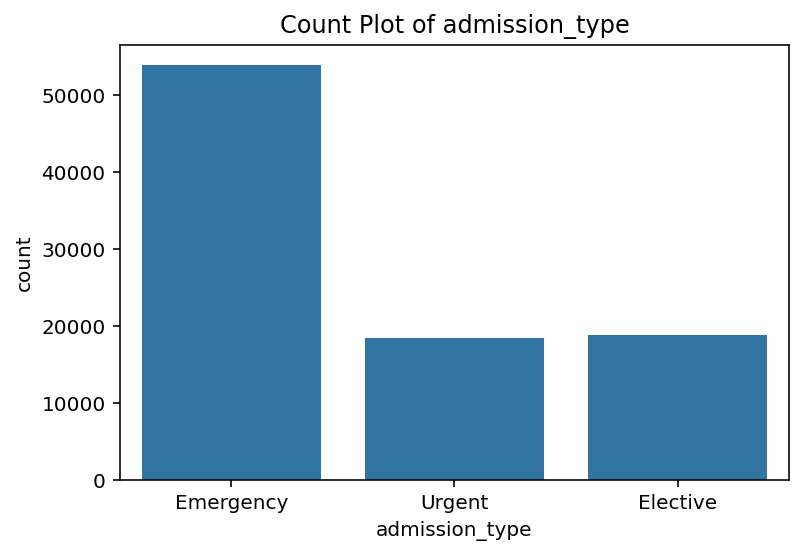

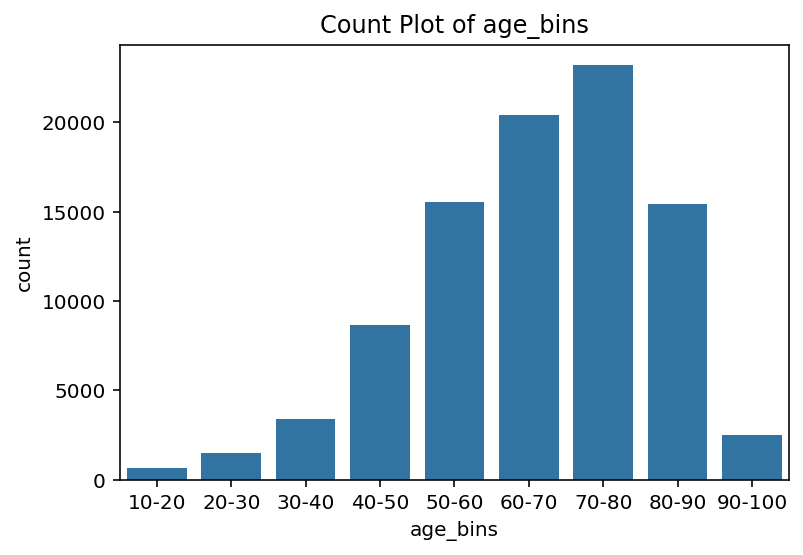

,Type,Count,Missing,Unique,Mode,Min,Q1,Median,Q3,Max,Mean,Std,Skew,Kurt
Variable,,,,,,,,,,,,,,
patient_nbr,int64,91193.0,0,64109,88785891,135.0,23272443.0,45818487.0,88059915.0,189502619.0,54694623.49835,39151927.145714,0.469182,-0.322632
gender,object,91193.0,0,3,Female,-,-,-,-,-,-,-,-,-
time_in_hospital,int64,91193.0,0,14,3,1.0,2.0,4.0,6.0,14.0,4.416315,2.993101,1.129565,0.836205
num_lab_procedures,int64,91193.0,0,114,1,1.0,33.0,44.0,57.0,132.0,43.421293,19.305233,-0.309498,-0.124294
num_procedures,int64,91193.0,0,7,0,0.0,0.0,1.0,2.0,6.0,1.345191,1.715577,1.313137,0.831917
diabetesMed,object,91193.0,0,2,Yes,-,-,-,-,-,-,-,-,-
readmitted,object,91193.0,0,2,No,-,-,-,-,-,-,-,-,-
admission_type,object,91193.0,0,3,Emergency,-,-,-,-,-,-,-,-,-
age_bins,object,91193.0,0,9,70-80,-,-,-,-,-,-,-,-,-


In [69]:
univariate(diabetes_df, plot = True)

In [26]:
winz_outliers(diabetes_df)

Outlier Analysis Report

Column: patient_nbr
Number of Outliers: 154
Lower Outer Fence: -171028989.0
Upper Outer Fence: 282319200.0

Column: time_in_hospital
Number of Outliers: 2066
Lower Outer Fence: -10.0
Upper Outer Fence: 18.0

Column: num_lab_procedures
Number of Outliers: 173
Lower Outer Fence: -39.0
Upper Outer Fence: 129.0

Column: num_procedures
Number of Outliers: 4570
Lower Outer Fence: -6.0
Upper Outer Fence: 8.0


In [70]:
#Final for export
uci_readmit_210 = diabetes_df.copy()

In [71]:
uci_readmit_210.to_csv('uci_readmit_210.csv', index=False)

### WGU data set

In [26]:
# Import WGU data set
med_df = pd.read_csv('medical_clean_210.csv')
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [27]:
## Find duplicates
print(med_df.duplicated().value_counts()) # this gives a count of unique values (this case is true/false)
print(med_df.duplicated().sum()) # This gives a count of the nymber of duplicates(counting the true)

False    10000
Name: count, dtype: int64
0


In [28]:
#Count number of missing values by columns
med_df.isnull().sum() 

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

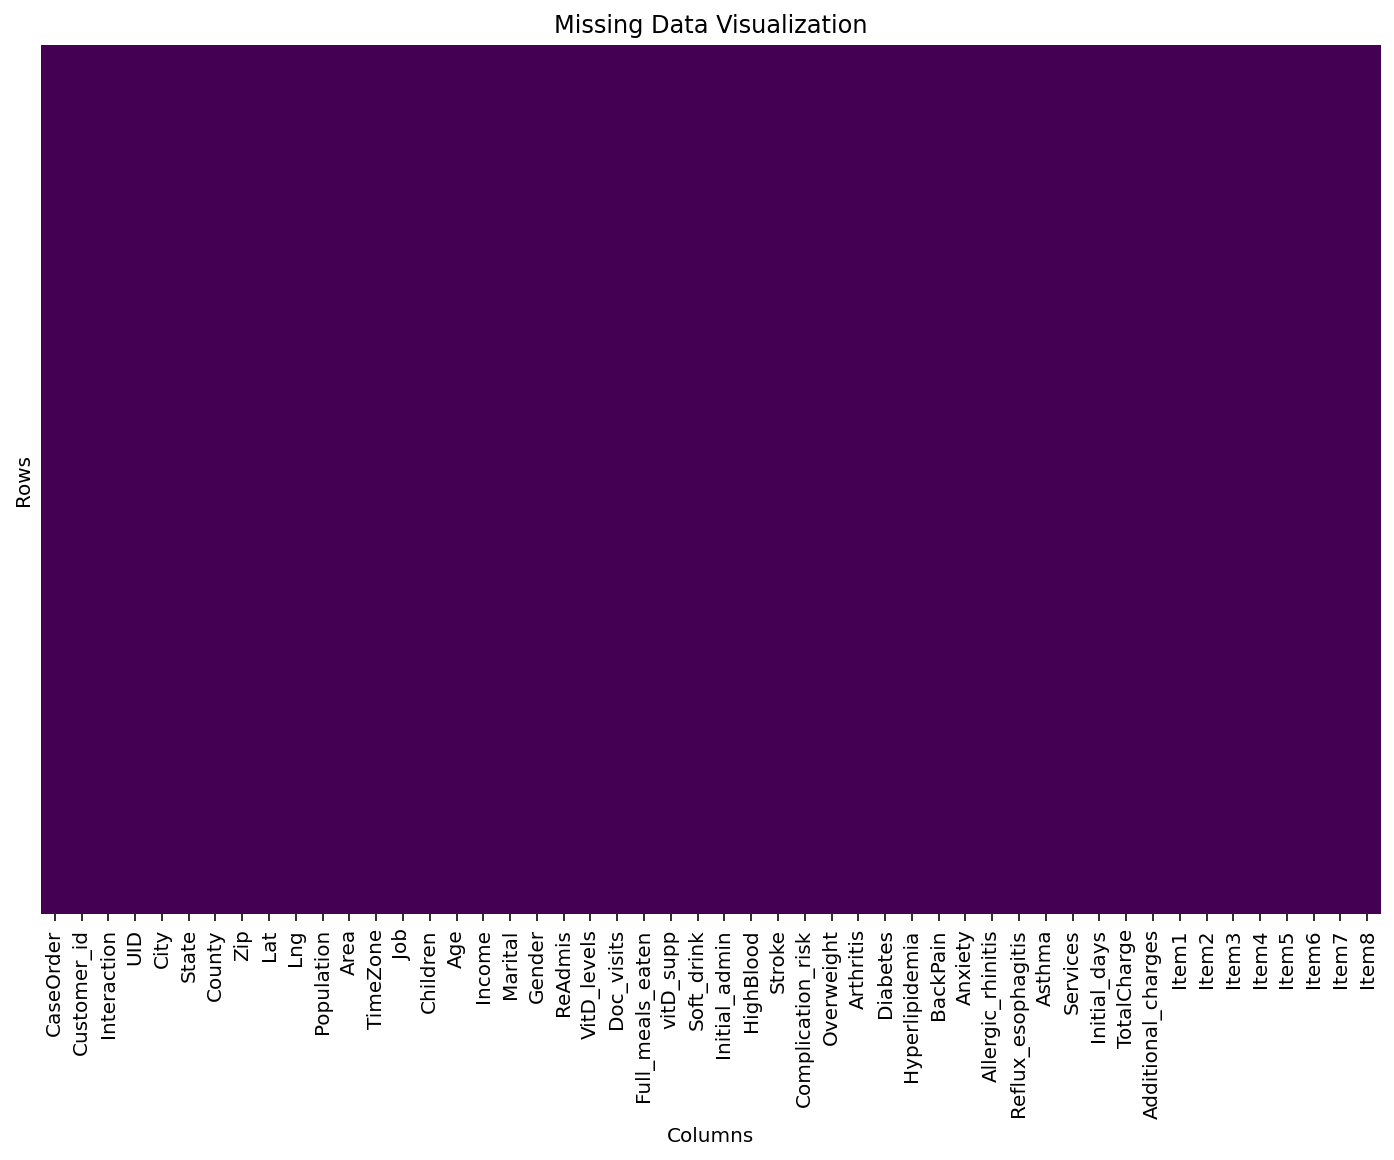

In [29]:
## Create Visualizations of the missing value

plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary

# Create a heatmap to visualize missing data (null values)
# Set cbar=False to hide the color bar and add column names (xticklabels) for clarity
sns.heatmap(med_df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=med_df.columns)
plt.xticks(rotation=90)  # Rotate column names for better readability

plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [30]:
#Rename dataset
clean_df = med_df.copy()

#Explore the data
clean_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [31]:
#Explore summary statistiscs on a data set
clean_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [32]:
# Clean the data set columns using created function based on tresholds
#missing_threshold = 0.95, unique_threshold = 0.95, only 1 value in a column --> removes

#Function for cleaning columns
def clean_columns(df, columns =[], missing_threshold = 0.95, unique_threshold = 0.95, messages = True):
    
    if len(columns) == 0:
        columns = df.columns #this lets the columns be blank and every columns will be cleaned
    
    for col in columns:
        if col in df.columns:
            missing = df[col].isna().sum()
            unique = df[col].nunique()
            rows = df.shape[0]  
            
            if missing / rows >= missing_threshold:
                if messages: print(f"To many missing values with ({missing} out of {rows}, {round((missing / rows) * 100, 2)}%) for {col}, removed")
                df.drop(columns =[col], inplace = True)
            # For non-numeric columns, check if there are too many unique values
            if not pd.api.types.is_numeric_dtype(df[col]) and (unique / rows >= unique_threshold):
                if messages: 
                    print(f"Too many unique values with ({unique} out of {rows}, {round((unique / rows) * 100, 2)}%) for {col}, removed")
                df.drop(columns=[col], inplace=True)
                continue
            elif unique == 1:
                if messages: print(f"Only one value in ({df[col].unique()[0]} for {col}, removed")
                df.drop(columns =[col], inplace = True)
         
        else:
            if messages: print(f"The column variable \"{col}\" doesnt exist as spelled in the DataFrame provided")
     
    return df

clean_columns(clean_df)

Too many unique values with (10000 out of 10000, 100.0%) for Customer_id, removed
Too many unique values with (10000 out of 10000, 100.0%) for Interaction, removed
Too many unique values with (10000 out of 10000, 100.0%) for UID, removed


,CaseOrder,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [33]:
# Remove the index column
clean_df = clean_df.iloc[:, 1:]
#Verify
clean_df.head()

,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [34]:
def univariate(df, plot=False):
    stats = []
    
    for col in df.columns:
        col_data = df[col].dropna()  # Drop NA early to avoid repeated calculation
        dtype = col_data.dtype
        desc = col_data.describe() if pd.api.types.is_numeric_dtype(col_data) else None
        
        stats_row = {
            "Variable": col,
            "Type": dtype,
            "Count": desc['count'] if desc is not None else col_data.count(),
            "Missing": df[col].isna().sum(),
            "Unique": col_data.nunique(),
            "Mode": col_data.mode().iloc[0] if not col_data.mode().empty else None
        }

        if pd.api.types.is_numeric_dtype(col_data):
            stats_row.update({
                "Min": desc['min'],
                "Q1": desc['25%'],
                "Median": desc['50%'],
                "Q3": desc['75%'],
                "Max": desc['max'],
                "Mean": desc['mean'],
                "Std": desc['std'],
                "Skew": col_data.skew(),
                "Kurt": col_data.kurt()
            })
            if plot:
                sns.histplot(col_data, kde=True)
                plt.title(f'Histogram of {col}')
                plt.show()
        else:
            stats_row.update({"Min": "-", "Q1": "-", "Median": "-", "Q3": "-", "Max": "-", "Mean": "-", "Std": "-", "Skew": "-", "Kurt": "-"})
            if plot:
                sns.countplot(x=col_data, data=df)
                plt.title(f'Count Plot of {col}')
                plt.show()

        stats.append(stats_row)

    output_df = pd.DataFrame(stats)
    output_df.set_index("Variable", inplace=True)
    return output_df


In [35]:
univariate(clean_df)  # (plot = True) # takes a lot of memory for all plots

,Type,Count,Missing,Unique,Mode,Min,Q1,Median,Q3,Max,Mean,Std,Skew,Kurt
Variable,,,,,,,,,,,,,,
City,object,10000.0,0,6072,Houston,-,-,-,-,-,-,-,-,-
State,object,10000.0,0,52,TX,-,-,-,-,-,-,-,-,-
County,object,10000.0,0,1607,Jefferson,-,-,-,-,-,-,-,-,-
Zip,int64,10000.0,0,8612,24136,610.0,27592.0,50207.0,72411.75,99929.0,50159.3239,27469.588208,0.022813,-1.065366
Lat,float64,10000.0,0,8588,28.51879,17.96719,35.25512,39.419355,42.044175,70.56099,38.751099,5.403085,0.008565,2.684186
Lng,float64,10000.0,0,8725,-97.76466,-174.2097,-97.352982,-88.39723,-80.43805,-65.29017,-91.24308,15.205998,-1.258973,2.3167
Population,int64,10000.0,0,5951,0,0.0,694.75,2769.0,13945.0,122814.0,9965.2538,14824.758614,2.229959,5.880913
Area,object,10000.0,0,3,Rural,-,-,-,-,-,-,-,-,-
TimeZone,object,10000.0,0,26,America/New_York,-,-,-,-,-,-,-,-,-


In [36]:
print(clean_df.columns)

Index(['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender',
       'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [37]:
## Choose variables to narrow down

wgu_data_210 = clean_df[[
     'State', 'Lat', 'Lng', 'Population', 'Area',
     'Children', 'Age', 'Income', 'Marital', 'Gender',
     'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
     'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
     'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
     'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
     'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
     'TotalCharge', 'Additional_charges'
]].copy()
#Verify new data set
wgu_data_210.head()

,State,Lat,Lng,Population,Area,Children,Age,Income,Marital,Gender,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,2951,Suburban,1,53,86575.93,Divorced,Male,...,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,11303,Urban,3,51,46805.99,Married,Female,...,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,17125,Suburban,3,53,14370.14,Widowed,Female,...,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,2162,Suburban,0,78,39741.49,Married,Male,...,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,5287,Rural,1,22,1209.56,Widowed,Female,...,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [38]:
## Remove spaces in catagory names within columns
# To replace spaces with underscores in specific columns

for col in wgu_data_210.columns:
     if not pd.api.types.is_numeric_dtype(wgu_data_210[col]):
        wgu_data_210[col] = wgu_data_210[col].str.replace(" ", "_", regex = False) 
        
##Clean White Space and make all lower case
wgu_data_210.columns = wgu_data_210.columns.str.lower().str.strip()       

#round values to 2 decimal points
wgu_data_210 = wgu_data_210.round(2)

#Verify space removal/ replacement
wgu_data_210.head()

,state,lat,lng,population,area,children,age,income,marital,gender,...,hyperlipidemia,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,totalcharge,additional_charges
0,AL,34.35,-86.73,2951,Suburban,1,53,86575.93,Divorced,Male,...,No,Yes,Yes,Yes,No,Yes,Blood_Work,10.59,3726.70,17939.40
1,FL,30.85,-85.23,11303,Urban,3,51,46805.99,Married,Female,...,No,No,No,No,Yes,No,Intravenous,15.13,4193.19,17613.00
2,SD,43.54,-96.64,17125,Suburban,3,53,14370.14,Widowed,Female,...,No,No,No,No,No,No,Blood_Work,4.77,2434.23,17505.19
3,MN,43.90,-93.51,2162,Suburban,0,78,39741.49,Married,Male,...,No,No,No,No,Yes,Yes,Blood_Work,1.71,2127.83,12993.44
4,VA,37.60,-76.89,5287,Rural,1,22,1209.56,Widowed,Female,...,Yes,No,No,Yes,No,No,CT_Scan,1.25,2113.07,3716.53


In [39]:
wgu_data_210.to_csv('wgu_data_210.csv', index=False)